# Seattle AirBNB data analysis

##### The motivation behind this project is analyze data about Airbnb homes in the city of Seattle in the year of 2016 and extract information and insights to answer to 3 questions regarding the use of Airbnb in Seattle

##### Q1 - What season is less/more available?
##### Q2 - Which neighbourhoods are more/less expensive?
##### Q3 - What locations have the best ratings?
##### Q4 - What is the relationship between prices and review scores?
##### Q5 - What season is more expensive?

## Importing the modules needed

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Opening datasets available about Seattle Airbnb

In [2]:
listings_df = pd.read_csv('listings.csv')
calendar_df = pd.read_csv('calendar.csv')
reviews_df = pd.read_csv('reviews.csv')

## Checking the data from each dataset

In [3]:
reviews_df.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,7202016,38917982,2015-07-19,28943674,Bianca,Cute and cozy place. Perfect location to every...
1,7202016,39087409,2015-07-20,32440555,Frank,Kelly has a great room in a very central locat...
2,7202016,39820030,2015-07-26,37722850,Ian,"Very spacious apartment, and in a great neighb..."
3,7202016,40813543,2015-08-02,33671805,George,Close to Seattle Center and all it has to offe...
4,7202016,41986501,2015-08-10,34959538,Ming,Kelly was a great host and very accommodating ...


In [4]:
listings_df.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,...,NaN,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,9.0,f,NaN,WASHINGTON,f,strict,f,f,1,0.89


In [5]:
calendar_df.head()

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN


## Q1: What season is less/more available?

In [6]:
# Replacing 't' and 'f' values on the column 'available' with 1 and 0
calendar = calendar_df.replace(['t','f'],[1,0])
calendar.head()

,listing_id,date,available,price
0,241032,2016-01-04,1,$85.00
1,241032,2016-01-05,1,$85.00
2,241032,2016-01-06,0,NaN
3,241032,2016-01-07,0,NaN
4,241032,2016-01-08,0,NaN


In [7]:
availability = calendar.groupby('date', as_index=False)[['date','available']].mean()

In [8]:
availability.head()

,date,available
0,2016-01-04,0.454426
1,2016-01-05,0.488999
2,2016-01-06,0.478261
3,2016-01-07,0.465165
4,2016-01-08,0.466737


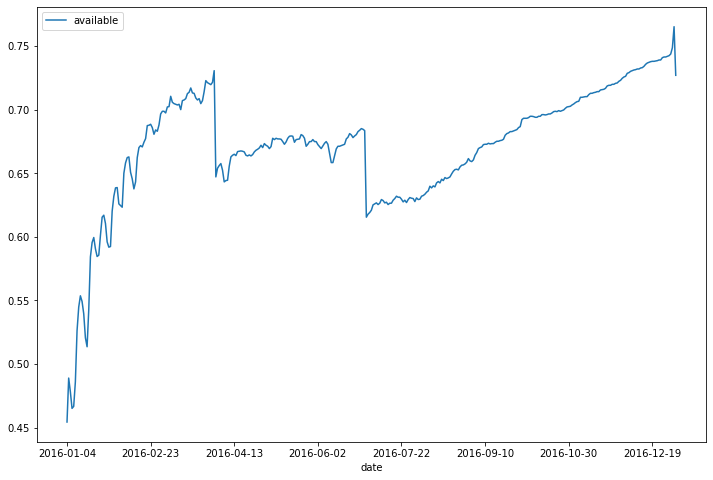

In [9]:
# Plotting place availability in seattle by date
availability.plot(x='date',y = 'available', figsize = (12,8))

#### We can see that in the period between january and march the availability is increasing until it has a huge decrease in the first days of april due to the end of the winter. Also we can observe availability drop starting from middle june to the end of july since is the time of the year that Seattle has more sunny days.   

## Q2: Which neighbourhoods are more/less expensive?

In [10]:
listings = listings_df['price'].str.replace('$','')
listings

0        85.00
1       150.00
2       975.00
3       100.00
4       450.00
         ...  
3813    359.00
3814     79.00
3815     93.00
3816     99.00
3817     87.00
Name: price, Length: 3818, dtype: object

In [11]:
listings = listings.str.replace(',','')
listings

0        85.00
1       150.00
2       975.00
3       100.00
4       450.00
         ...  
3813    359.00
3814     79.00
3815     93.00
3816     99.00
3817     87.00
Name: price, Length: 3818, dtype: object

In [12]:
listings_df['price'] = listings
listings_df['price'] = listings_df['price'].astype('float')

In [13]:
listings_df['price']

0        85.0
1       150.0
2       975.0
3       100.0
4       450.0
        ...  
3813    359.0
3814     79.0
3815     93.0
3816     99.0
3817     87.0
Name: price, Length: 3818, dtype: float64

In [14]:
neigh_df = listings_df.groupby('neighbourhood', as_index=False)['price'].mean().sort_values(['price'])
neigh_df.tail(10)

,neighbourhood,price
59,Queen Anne,168.764706
79,Windermere,174.700000
55,Pike Place Market,175.512821
40,Magnolia,176.000000
45,Montlake,195.947368
0,Alki,196.652174
78,Westlake,197.000000
58,Portage Bay,241.428571
31,Industrial District,245.000000
17,Fairmount Park,370.000000


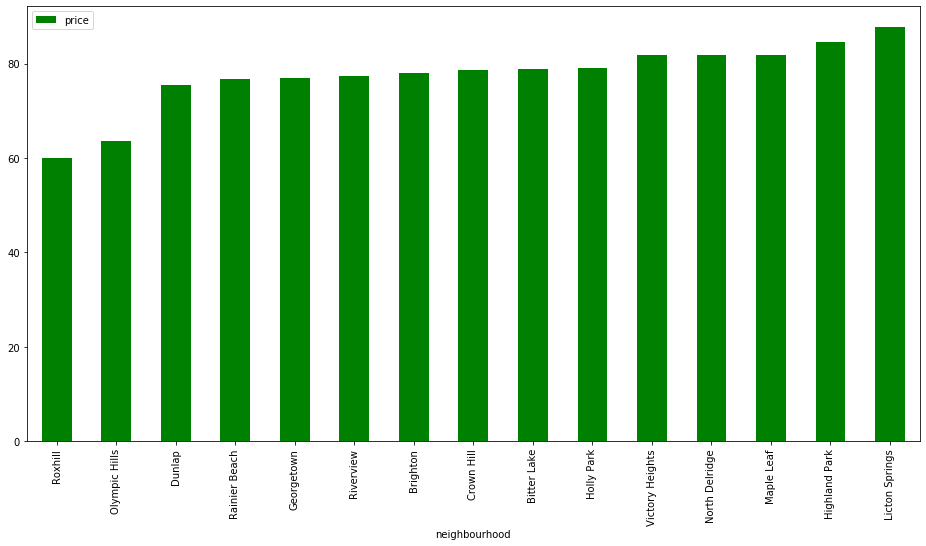

In [15]:
neigh_df.head(15).plot.bar(x = 'neighbourhood', y = 'price', color = 'green', figsize = (16,8))

In [16]:
neigh_df2 = listings_df.groupby('neighbourhood', as_index=False)['price'].mean().sort_values(['price'], ascending = False)

(50, 90)

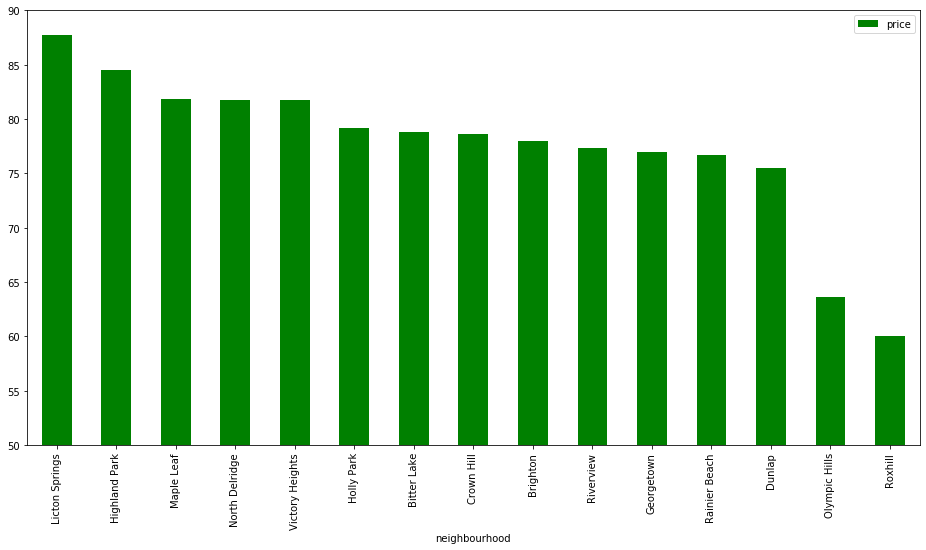

In [17]:
neigh_df2.tail(15).plot.bar(x = 'neighbourhood', y = 'price', color = 'green', figsize = (16,8))
plt.ylim([50,90])

##### The graph above show us the top 15 most expensive neighbouhoods in Seattle

## Q3 What locations have the best ratings?

In [18]:
ratings_df = listings_df.copy()
ratings_df.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,...,NaN,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,9.0,f,NaN,WASHINGTON,f,strict,f,f,1,0.89


In [19]:
ratings_df.review_scores_value.isna().mean()

0.17181770560502882

In [20]:
ratings_cleaned_df = ratings_df.dropna(subset = ['review_scores_value'])

In [21]:
ratings_cleaned_df[ratings_df.review_scores_value.isna()]

C:\Users\marcu\anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month


In [22]:
ratings_cleaned_df = ratings_cleaned_df.groupby("neighbourhood", as_index = False)['review_scores_value'].mean()
ratings_cleaned_df = ratings_cleaned_df.sort_values(by = ['review_scores_value'])
ratings_cleaned_df.tail(15)

,neighbourhood,review_scores_value
60,Riverview,9.750000
33,Laurelhurst,9.750000
6,Brighton,9.750000
21,Genesee,9.769231
49,North Delridge,9.772727
63,Seaview,9.777778
35,Licton Springs,9.777778
28,Highland Park,9.800000
40,Maple Leaf,9.810811
58,Rainier Beach,9.812500


(9.5, 10.1)

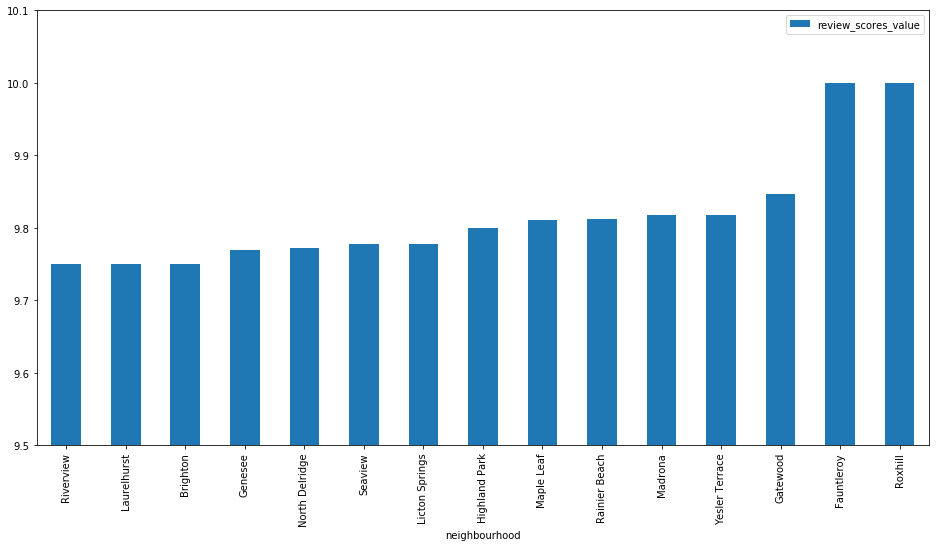

In [23]:
ratings_cleaned_df.tail(15).plot.bar(x = 'neighbourhood', y = 'review_scores_value', figsize = (16,8))
plt.ylim([9.5,10.1])

##### The graph above show us the top 15 neighbouhoods best rated in seattle

## Q4 - What season is more expensive?

In [24]:
# We'll use the calendar dataset to answer that question
calendar.head()

,listing_id,date,available,price
0,241032,2016-01-04,1,$85.00
1,241032,2016-01-05,1,$85.00
2,241032,2016-01-06,0,NaN
3,241032,2016-01-07,0,NaN
4,241032,2016-01-08,0,NaN


In [25]:
# Adjusting the price column to numeric type
pricing_df = calendar.copy()
pricing_df['price'] = calendar['price'].str.replace('$','')
pricing_df.head()

,listing_id,date,available,price
0,241032,2016-01-04,1,85.00
1,241032,2016-01-05,1,85.00
2,241032,2016-01-06,0,NaN
3,241032,2016-01-07,0,NaN
4,241032,2016-01-08,0,NaN


In [26]:
pricing_df.price.isnull().mean()

0.32938998399793334

##### As we can see, nearly one third of the listings don't have prices in the dataset, but we will eliminate the missing data in order to see how the prices behave along the year

In [27]:
pricing_df = pricing_df.dropna(subset = ['price'])
pricing_df

,listing_id,date,available,price
0,241032,2016-01-04,1,85.00
1,241032,2016-01-05,1,85.00
9,241032,2016-01-13,1,85.00
10,241032,2016-01-14,1,85.00
14,241032,2016-01-18,1,85.00
...,...,...,...,...
1393207,10208623,2016-01-06,1,87.00
1393208,10208623,2016-01-07,1,87.00
1393211,10208623,2016-01-10,1,87.00
1393212,10208623,2016-01-11,1,87.00


In [28]:
pricing_list = pricing_df.price.str.replace(',','')
pricing_list = pricing_list.astype('float')

In [29]:
pricing_df['price'] = pricing_list
pricing_df.head()

,listing_id,date,available,price
0,241032,2016-01-04,1,85.0
1,241032,2016-01-05,1,85.0
9,241032,2016-01-13,1,85.0
10,241032,2016-01-14,1,85.0
14,241032,2016-01-18,1,85.0


In [30]:
pricing_df.date = pd.to_datetime(pricing_df['date'])

In [31]:
pricing_df.head()

,listing_id,date,available,price
0,241032,2016-01-04,1,85.0
1,241032,2016-01-05,1,85.0
9,241032,2016-01-13,1,85.0
10,241032,2016-01-14,1,85.0
14,241032,2016-01-18,1,85.0


In [32]:
prices_cleaned = pricing_df.groupby(pricing_df['date'].dt.strftime('%B'))['price'].mean().sort_index()

In [33]:
prices_cleaned

date
April        135.097005
August       150.656594
December     137.251835
February     124.293927
January      122.912176
July         152.094150
June         147.473137
March        128.644488
May          139.538183
November     135.688738
October      137.031939
September    143.255949
Name: price, dtype: float64

(100, 160)

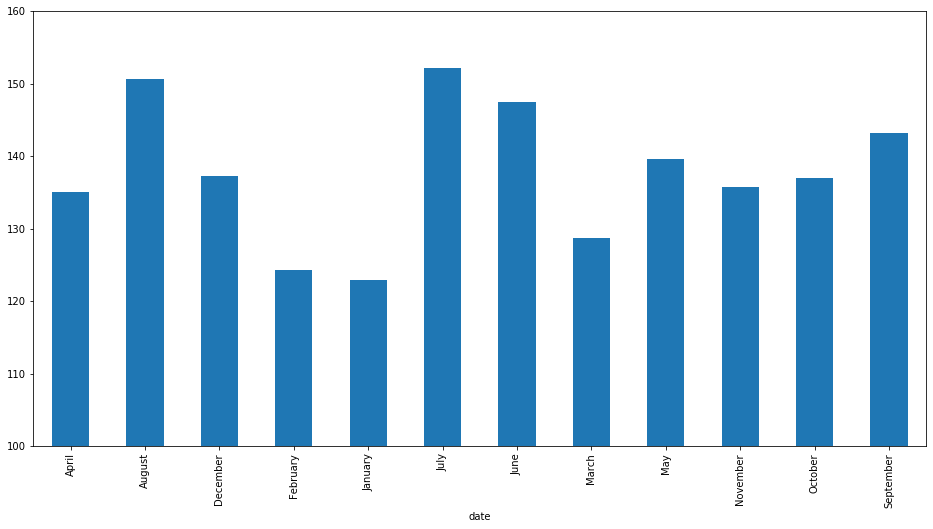

In [34]:
prices_cleaned.plot.bar(x = 'date', y = 'price', figsize = (16,8))
plt.ylim([100,160])

##### As we can see, the most expensive months are june, july and august. Exactly when the place availability is in its minimum

## Q5 - What is the relation between price and ratings?

In [72]:
# Importing the packages to do the modeling
import statsmodels.api as sm

In [111]:
model_data = listings_df.copy()

In [112]:
#once more let's drop missing values and group the data by neighbouhood
model_data = model_data.dropna(subset = ['review_scores_value'])
model_data = model_data.groupby("neighbourhood", as_index = False)[['review_scores_value','price']].mean()
model_data.head()

,neighbourhood,review_scores_value,price
0,Alki,9.466667,179.866667
1,Arbor Heights,9.333333,118.000000
2,Atlantic,9.558140,113.604651
3,Ballard,9.546448,120.289617
4,Belltown,9.192308,164.752747


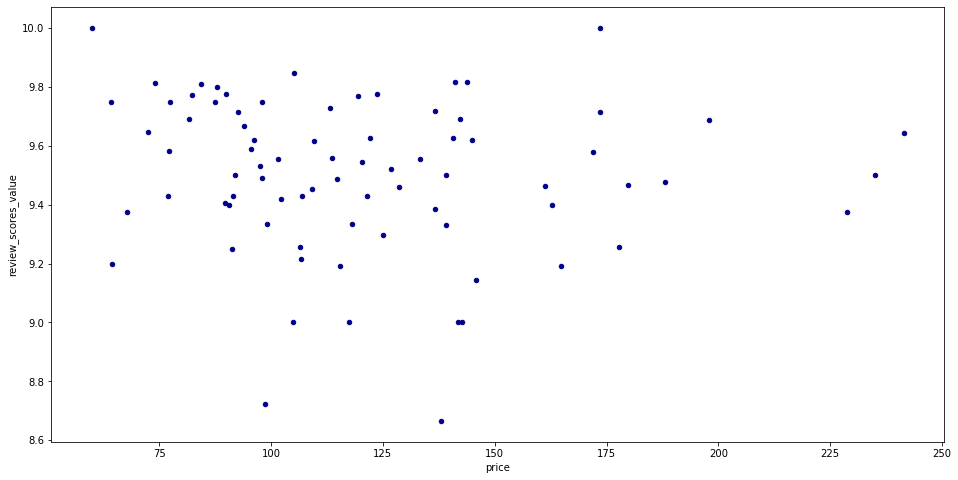

In [113]:
# Now Let's visualize the data
model_data.plot.scatter(x='price',y='review_scores_value', c = 'DarkBlue', figsize = (16,8))

In [131]:
# Drop some outliers to enhance the relation between review scores and prices
model_data = model_data[model_data.price<225]
model_data = model_data[model_data.review_scores_value<10]
model_data = model_data[model_data.review_scores_value>8.8]

In [132]:
X = model_data['price']
X = sm.add_constant(X)
y = model_data['review_scores_value']
model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

                             OLS Regression Results                            
Dep. Variable:     review_scores_value   R-squared:                       0.027
Model:                             OLS   Adj. R-squared:                  0.013
Method:                  Least Squares   F-statistic:                     1.943
Date:                 Sun, 07 Feb 2021   Prob (F-statistic):              0.168
Time:                         21:47:26   Log-Likelihood:                 7.7467
No. Observations:                   72   AIC:                            -11.49
Df Residuals:                       70   BIC:                            -6.940
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          9.6456      0.100     96.43

In [133]:
print (results.params)

const    9.645647
price   -0.001160
dtype: float64


In [134]:
alpha = results.params[1]
beta = results.params[0]

In [139]:
xi = np.arange(50,210,0.1)
yi = np.dot(xi,alpha) + beta

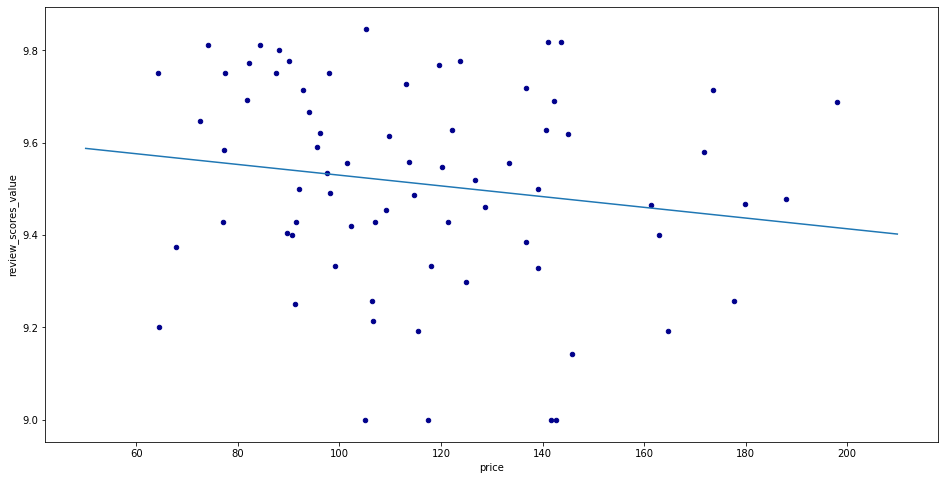

In [140]:
model_data.plot.scatter(x='price',y='review_scores_value', c = 'DarkBlue', figsize = (16,8))
plt.plot(xi,yi)
plt.show()